In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

df=pd.read_csv("penguins.csv")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop("sex", axis=1)

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

print(f"{X_train.shape}")
print(f"{X_test.shape}")

(268, 4)
(67, 4)


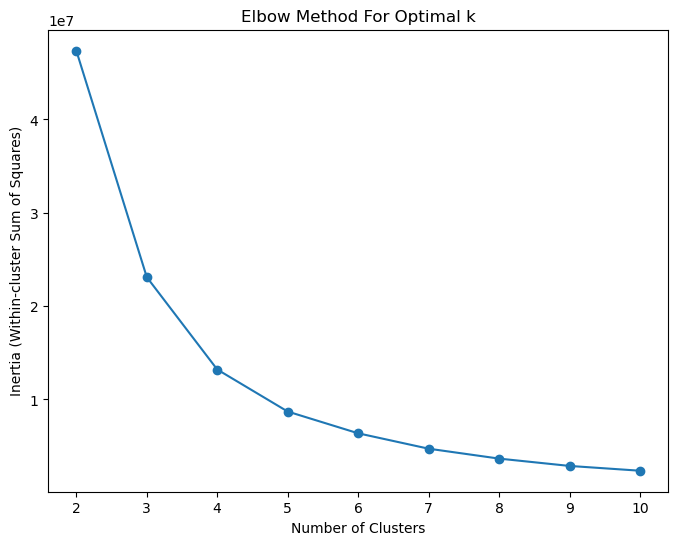

Optimal number of clusters: 3
Cluster centers:
[[  45.13678161   16.7816092   201.55172414 4495.97701149]
 [  41.38818898   18.02204724  190.37007874 3534.84251969]
 [  48.90555556   15.52962963  220.35185185 5455.55555556]]
Predicted clusters for the test data:
[1 1 0 1 1 2 1 1 0 1 1 1 2 2 0 1 1 0 1 0 1 2 1 2 1 1 1 1 1 1 0 2 1 0 2 0 1
 2 1 2 1 1 1 1 0 0 1 1 1 1 2 1 0 1 0 1 1 1 0 1 0 1 2 2 1 0 2]


In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.show()

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)

y_pred = kmeans.predict(X_test)

print(f"Optimal number of clusters: {n_clusters}")
print(f"Cluster centers:\n{kmeans.cluster_centers_}")
print(f"Predicted clusters for the test data:\n{y_pred}")

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

model = KMeans(n_clusters=6)
model.fit(df)
model.cluster_centers_

array([[4.45682540e+01, 1.76206349e+01, 1.96174603e+02, 4.30992063e+03,
        1.66666667e+00],
       [4.25938776e+01, 1.84224490e+01, 1.92132653e+02, 3.74285714e+03,
        1.53061224e+00],
       [5.00913043e+01, 1.57608696e+01, 2.22152174e+02, 5.61521739e+03,
        2.00000000e+00],
       [4.20000000e+01, 2.02000000e+01, 5.00000000e+03, 4.25000000e+03,
        2.00000000e+00],
       [4.59474576e+01, 1.52220339e+01, 2.13813559e+02, 4.89745763e+03,
        1.33898305e+00],
       [3.96617647e+01, 1.75441176e+01, 1.88044118e+02, 3.23897059e+03,
        1.10294118e+00]])